In [27]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Salvar a conta com o canal correto
QiskitRuntimeService.save_account(
    token="75acdb50864742fffa775206d23d065002dab431ae93e543315b268b2e9186d4a307e7ec1f24ef943ec2d1c234b33227e939aff93393d7272b1ea780573d43de",
    channel="ibm_quantum",
    overwrite=True
)


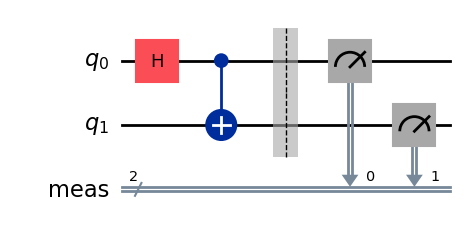

In [21]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.measure_all()

qc.draw("mpl")

In [22]:
from qiskit_ibm_runtime import QiskitRuntimeService,Sampler

service = QiskitRuntimeService()

backend = service.least_busy(simulator=False,
                             operational=True)

sampler = Sampler(backend)

job = sampler.run(qc)

job.result()

ValueError: An invalid Sampler pub-like was given (<class 'qiskit._accelerate.circuit.CircuitInstruction'>). If you want to run a single circuit, you need to wrap it with `[]` like `sampler.run([circuit])` instead of `sampler.run(circuit)`.

In [ ]:
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.primitives import StatevectorSampler

# Inicializar o serviço IBM Quantum
service = QiskitRuntimeService()

# Tentar selecionar o backend menos ocupado
try:
    backend = service.least_busy(simulator=True, operational=True)  # Alterado para buscar simuladores
    print(f"Usando o backend: {backend}")
except Exception as e:
    print(f"Erro ao selecionar backend: {e}")
    exit()

# Criar o circuito quântico
qc = QuantumCircuit(2)
qc.h(0)  # Aplicar Hadamard no qubit 0
qc.cx(0, 1)  # Aplicar CNOT
qc.measure_all()  # Adicionar medições

# Configurar o sampler
sampler = StatevectorSampler(backend=backend)  # Passar o backend escolhido

# O método `run` espera uma lista de circuitos
job = sampler.run([qc])  # Passar o circuito como uma lista

# Obter os resultados do trabalho
result = job.result()

# Exibir os resultados
print("Resultados:", result.quasi_dists)  # Aqui acessamos as distribuições quasi-clássicas


Erro ao selecionar backend: 'No backend matches the criteria.'


NameError: name 'backend' is not defined

: 

In [35]:
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.primitives import StatevectorSampler

# Inicializar o serviço IBM Quantum
service = QiskitRuntimeService()

# Tentar selecionar o backend menos ocupado
try:
    backend = service.least_busy(simulator=False, operational=True)
    print(f"Usando o backend: {backend}")
except Exception as e:
    print(f"Erro ao selecionar backend: {e}")
    exit()

# Criar o circuito quântico
qc = QuantumCircuit(2)
qc.h(0)  # Aplicar Hadamard no qubit 0
qc.cx(0, 1)  # Aplicar CNOT
qc.measure_all()  # Adicionar medições

# Configurar o sampler
sampler = StatevectorSampler()

# O método `run` espera uma lista de circuitos
job = sampler.run([qc])  # Passar o circuito como uma lista

# Obter os resultados do trabalho
result = job.result()

# Exibir os resultados
print("Resultados:", result.quasi_dists)


Usando o backend: <IBMBackend('ibm_brisbane')>


AttributeError: 'PrimitiveResult' object has no attribute 'quasi_dists'

In [30]:
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler

# Inicializar o serviço IBM Quantum
service = QiskitRuntimeService()

# Selecionar o backend menos ocupado
backend = service.least_busy(simulator=False, operational=True)
print(f"Usando o backend: {backend}")

# Criar o circuito quântico
qc = QuantumCircuit(2)
qc.h(0)  # Aplicar Hadamard no qubit 0
qc.cx(0, 1)  # Aplicar CNOT
qc.measure_all()  # Adicionar medições

# Configurar o sampler com o backend
sampler = Sampler(backend=backend)  # Passar o backend selecionado

# O método `run` espera uma lista de circuitos
job = sampler.run([qc])  # Passar o circuito como uma lista

# Obter os resultados do trabalho
result = job.result()

# Exibir os resultados
print("Resultados:", result.quasi_dists)


Usando o backend: <IBMBackend('ibm_brisbane')>


TypeError: SamplerV2.__init__() got an unexpected keyword argument 'backend'

In [33]:
from qiskit.primitives import Sampler

sampler = Sampler()
job = sampler.run(qc)
job.result()

print(job)

/tmp/ipykernel_6342/283852434.py:3: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()
